# **Ipydoodle 거울 만들기 프로젝트**

영희는 메타버스를 사랑하는 한 유저입니다. 영희는 자신만의 방을 꾸미고 이를 자랑하는 것을 즐깁니다.  
그러던 어느날, 친구들이 내일 영희의 메타버스 속 방에 놀러오겠다고 합니다.  
방을 치우던 영희는 자신의 방에 거울이 없다는 것을 깨달았습니다.  
거울 하나 없는 방은 얼마나 답답하겠어요, 영희는 거울을 설치하려고 했습니다.  
그런데 게으른 메타버스의 개발자들은 아직 거울을 설치할 수 있는 기능을 안만들었다지 뭡니까!  
영희는 한숨을 쉬며 "차라리 내가 만들고 말지"를 시전하려고 합니다.   
영희를 도와 방에 있는 물건들을 비춰줄 수 있는 거울을 만들어봅시다!  
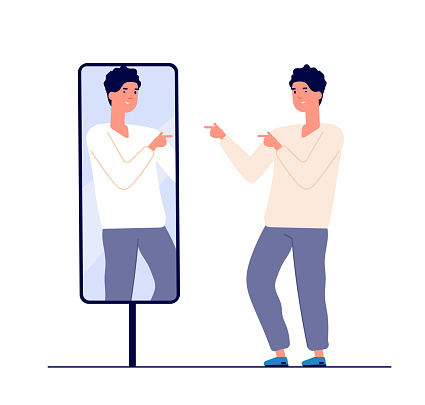!

### Step 1. 거울의 원리 생각해보기!

게임 속 거울의 원리를 아시나요? 이전에 있었던 게임에서 거울은 어떻게 구현되었을까요?  
게임이 만들어지기 시작하던 시기의 거울은 정말 단순했습니다. 거울 건너편에 똑같은 공간을 하나 더 만들어서, 대칭인 위치에 물체를 하나 더 놓는겁니다!   
아래의 그림과 같이, 거울을 기준으로 같은 거리 만큼의 대칭점에 물체를 반대로 놓아주는거죠.  
(플레이어가 그 공간에 들어갈 수 없다면 정말 거울처럼 보인답니다)
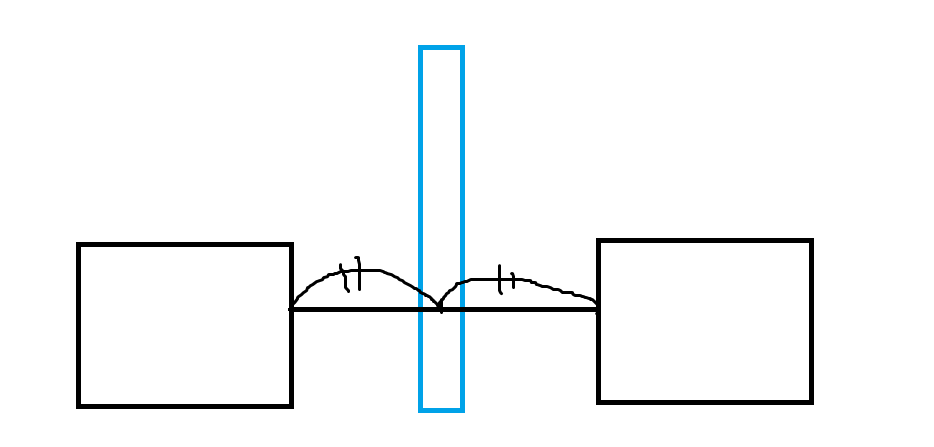

영희는 시간이 많이 없기 때문에 위 원리를 활용해서 거울을 만들거에요.  
실제 물체를 복사해서 놓는거지만, 다른 친구들은 이 물체가 반사된줄 알거에요 ㅎㅎ   
일종의 속임수이지만, 그래도 거울처럼 보이잖아요?

## **거울을 직접 구현해보기**

#### Step 2. 방 만들기

먼저 영희의 방을 임의로 만드는 함수 `make_room` 함수를 만들어봐요.
* 식탁은 상자로 만들고 화분은 원으로 표시합니다. 
* `make_room` 함수를 호출할때마다 식탁과 화분의 크기와 위치는 랜덤하게 바뀌게 해주세요.
* 방을 반으로 나누었을 때 화분은 x축을 기준으로 아래 쪽에, 식탁은 위 쪽에 있도록 해주세요. 화분과 식탁은 각각의 영역을 벗어나서도, 겹쳐서도 안돼요.
* 도전!) 색깔도 랜덤하게 설정해봅시다. 색깔은 길이 3짜리 배열이고, 각 배열의 원소는 0 이상 255 이하로 표현해줍니다.

화분과 식탁과의 위치와 크기, 색깔을 랜덤하게 설정해야하는데, 어떻게 할까요? 파이썬의 `random` 라이브러리를 사용해줄께요.   
아래의 예시 코드를 사용하면 범위 안에서 임의의 정수를 뽑아낼 수 있어요. 첫번째 인자는 최소값, 두번째 인자는 최대값을 의미해요.

In [21]:
# 예제 1. random 함수 활용 예시

from random import randint
for i in range(5):
    random_number = randint(1, 10) # 1 이상 10 이하의 정수를 뽑아줘!
    print(random_number)

4
10
10
8
6


위에서 배운 `randint` 함수를 활용하여 가구를 배치해봅시다.

In [24]:
# 예제 2. Ipydoodle에 randint 사용하기
from random import randint

def make_room():
    room = World(width = 700, height = 700)
    Line(x1 = -350, y1 = 350, x2 = 0, y2 = 350)
    Line(x1 = -350, y1 = -350, x2 = -350, y2 = 350)
    Line(x1 = -350, y1 = -350, x2 = 0, y2 = -350)
    # 위의 코드는 수정하지 말아주세요! 
    desk = Box(x = randint(-250,-100), y = randint(100,250), width = randint(50,100), height = randint(50,100), color = [randint(0,255),randint(0,255),randint(0,255)])
    flowerpot = Circle(x = randint(-250,-100), y = randint(-250,-100), radius = randint(50,100), color = [randint(0,255),randint(0,255),randint(0,255)])

    # desk = ...
    # flowerpot = ...

    return desk, flowerpot

desk, flowerpot = make_room()

Canvas(height=700)

#### Step 3. 거울 그리기

이제 주어진 방에 거울을 설치해봅시다. 영희는 거울이 큰걸 좋아하기 때문에, 방 한가운데를 가로지르려고 해요.  
한번 `Line` 함수를 사용해서 거울을 만들어봅시다! (거울 색은 여러분이 한번 정해보세요)

In [26]:
#예제 3 Line 함수를 활용하여 거울을 그려봅시다!
desk, flowerpot = make_room()
Line(x1 = 0, y1 = -350, x2 = 0, y2 = 350, color = 'blue')
# Line = ...

Canvas(height=700)

#### Step 4.거울에 물체 비추기

처음에 말했듯이, 지금 영희의 방에는 두가지 가구가 있어요. 네모 모양의 `desk`와 원 모양의 `flowerpot`이 있습니다.  
거울에 비친 두 가구의 모습을 만들기 위해서는 다음의 문제를 풀어야 해요.

**1.방에 있는 두 가구의 위치 가져오기**  
**2. 거울에 비친 두 가구의 위치 계산하기**  
**3. 계산한 위치에 똑같은 모습의 두 가구 만들기**

#### Step 4-1. 방에 있는 두 가구의 위치 가져오기  
`make_room`은 `desk`, `flowerpot`을 반환합니다. `desk`와 `flowerpot`로부터 위치를 뽑아볼까요?  
각각의 변수로부터 `pos`함수를 호출하면 위치를 계산할 수 있습니다.   
뽑아낸 위치 정보를 배열 형태로 각각의 다른 변수에 저장해주세요. 
* `pos`를 호출해 받은 변수는 `tuple`이라는 형태의 다른 변수입니다. 이를 배열로 변환하려면 어떻게 해야할까요? 

In [17]:
# 예제 4-1
# print(desk.pos)
# print(flowerpot.pos)
desk_pos = list(desk.pos)
flowerpot_pos = list(flowerpot.pos)
print(desk_pos, flowerpot_pos)

[-120, 209] [-122, -204]


#### Step 4-2 거울에 비친 두 가구의 위치 계산하기  
거울은 아까 봤듯이 방을 수직으로 가로질러 만들겁니다. 좌표상의 y축과 같죠.  
그렇다면 거울에 비친 두 가구의 위치는 어떻게 될까요? (힌트: 위에 있는 거울속의 원리를 참조하세요)

desk_pos와 flowerpot_pos는 길이 2짜리 배열입니다! 첫번째 원소는 x좌표이고, 두번째 원소는 y좌표에요.  
배열에 있는 원소를 편집하려면 어떻게 해야할까요? 
우선 인덱스 번호를 활용할줄 알아야 합니다. 다음 예시 코드를 보고 이해해봐요. (인덱스 코드는 0부터 시작합니다)

In [27]:
#예제 5 index 번호 활용하기
a = [1, 2, 3]
print('a[0]:', a[0]) # 인덱스는 0부터 시작합니다
a[2] = 4 # 배열 array의 2번 칸에 -1을 저장
print('a[2]:', a[2])
a[0] = a[1] # 배열 array의 0번 칸에 1번칸의 값을 저장
print('a[0]:', a[0])

a[0]: 1
a[2]: 4
a[0]: 2


위에서 배운 배열과 인덱스의 개념을 사용해서 `desk_pos`와 `flowerpot_pos`의 값을 편집해보세요

In [7]:
# 예제 6 y축을 기준으로 선대칭을 시키기.(y좌표는 유지되고, x좌표는 부호가 바뀔거에요)
desk_pos[0] = -desk_pos[0] # desk_pos[0] *= -1
flowerpot_pos[0] = -flowerpot_pos[0] # flowerpot_pos[0] *= -1
print(desk_pos, flowerpot_pos)

[220, 201] [249, -210]


#### Step 4-3 계산한 위치에 똑같은 모습의 두 가구 만들기  
계산한 위치에 각각 두 가구를 만들어볼까요? 참고로 영희가 가지고 있는 가구들은 거꾸로 봐도 똑바로 봐도 똑같답니다. 
> 주의: 가구를 복사하면 처음 `make_room`을 호출했던 위치에 가구가 생길거에요.
가구들의 색깔과 크기는 다음을 통해 가져올 수 있어요  
* `desk.width`: 식탁의 가로 길이
* `desk.height`: 식탁의 세로 길이
* `desk.color`: 식탁의 색깔
* `flowerpot.radius`: 화분의 반지름
* `flowerpot.color`: 화분의 색깔

In [29]:
#예제 7 거울로 비친 값을 desk_copy, flowerpot_copy에 저장하기
desk_copy = Box(x = desk_pos[0], y = desk_pos[1], color = desk.color, width = desk.width, height = desk.height)
flowerpot_copy = Circle(x = flowerpot_pos[0], y = flowerpot_pos[1], color = flowerpot.color, radius = flowerpot.radius)

#### Step 5 최종값 출력!
이 때까지 한 것들을 한번 모아서 한번에 실행해 볼까요?

In [30]:
desk, flowerpot = make_room()
Line(x1 = 0, y1 = -350, x2 = 0, y2 = 350, color = 'blue')

desk_pos = list(desk.pos)
flowerpot_pos = list(flowerpot.pos)

desk_pos[0] = -desk_pos[0]
flowerpot_pos[0] = -flowerpot_pos[0]

desk_copy = Box(x = desk_pos[0], y = desk_pos[1], color = desk.color, width = desk.width, height = desk.height)
flowerpot_copy = Circle(x = flowerpot_pos[0], y = flowerpot_pos[1], color = flowerpot.color, radius = flowerpot.radius)

Canvas(height=700)

### **마무리**

거울 만들기 대!성!공! 그렇게 영희는 방 소개를 잘 마칠 수 있었답니다 ^0^
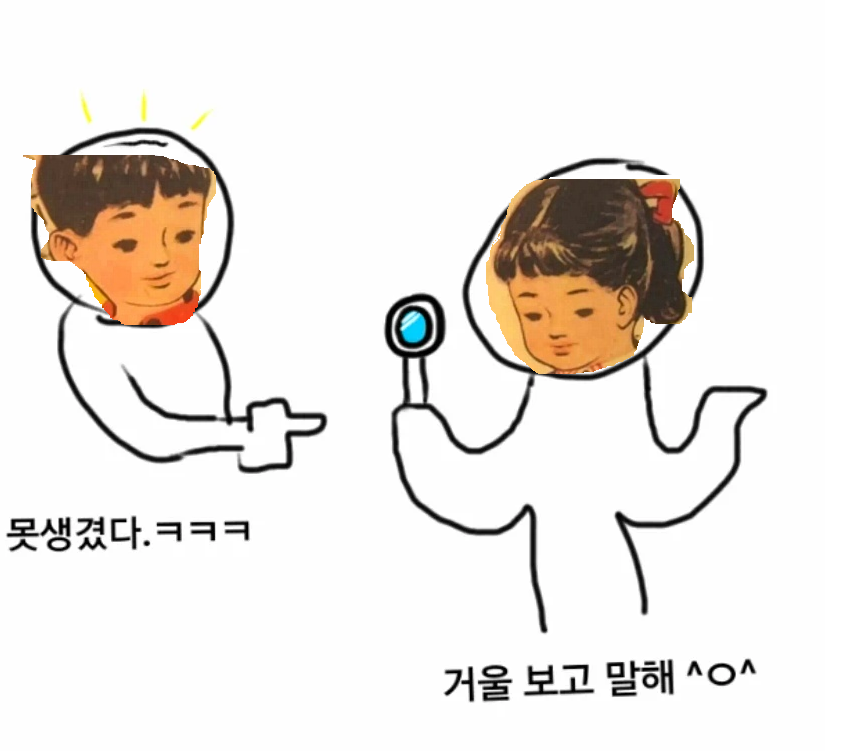